In [3]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

ModuleNotFoundError: No module named 'sklearn'

# 1. Loss functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

Rows of 𝑋 represent the data points, each containing the features of a single instance.

#### 1.2 What are the columns of $\mathbf{X}$?

Columns of 𝑋 represent different features across all data points.

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)? (1 point)

The matrix $\tilde{X}$ includes an extra column for the bias term 𝑤0, so it adds one extra column to 𝑋, making the shape change from (𝑁,𝑀)(N,M) to (𝑁,𝑀+1)(N,M+1).

For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.5 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$ (2 points)

In [9]:
def mean_squared_error(error_vector):
    mean_squared_error = int(np.mean(error_vector ** 2))  # Compute MSE by squaring the errors and taking the mean
    return mean_squared_error

In [10]:
def mean_absolute_error(error_vector):
    mean_absolute_error = int(np.mean(np.abs(error_vector)))  # Compute MAE by taking the absolute value of errors and then the mean
    return mean_absolute_error

In [11]:
print(mean_squared_error(np.array([0,0,0])))

0


In [12]:
print(mean_squared_error(np.array([1,1,1])))

1


Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.6 What is the shape of these cost functions as a function of the error  (1 point)

In [15]:
x_axis = np.linspace(-15,15,100) # change as you wish for your plot
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

Text(0, 0.5, 'cost function')

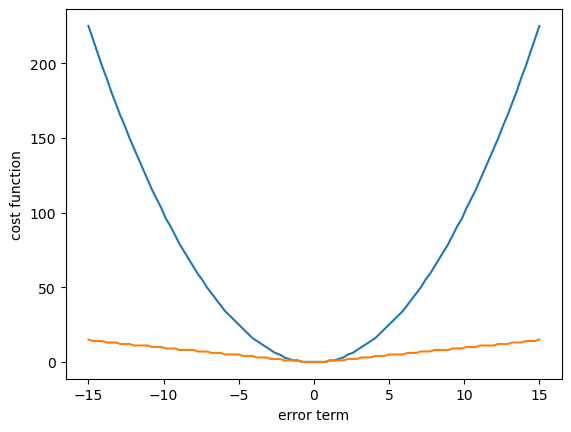

In [16]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

#### 1.7  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? (1 point) What implications does this have for gradient based optimization like gradient descent? (1 point)

MSE is differentiable for all 𝜖. However, MAE is not differentiable at ϵ=0 because the absolute value function has a sharp corner at zero. MSE is better suited for gradient-based optimization (e.g., gradient descent) because it is smooth and differentiable everywhere. MAE can cause problems in optimization near ϵ=0.

#### 1.8 Which loss function is more sensitive to outliers (1 point) and why (1 point)?

MSE is more sensitive to outliers because squaring larger errors results in disproportionately larger loss values compared to MAE, which grows linearly with error.

# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution (1 point)

If 𝑋 has full column rank, i.e., rank(𝑋)=number of columns rank(X)=number of columns.

#### 2.2 No solution (1 point)

If rank(𝑋)<rank(𝑋∣𝑦)rank(X)<rank(X∣y), i.e., the system is inconsistent.

#### 2.3 An infinite number of solutions (1 point)

If rank(𝑋)<number of columns rank(X)<number of columns, i.e., more unknowns than independent equations.

To calculate the weights, $\mathbf{w}$ we have to solve
\begin{equation}
    \mathbf{w} = \left(\mathbf{\tilde{X}}\mathbf{\tilde{X}}^T\right)^{-1}\mathbf{\tilde{X}}^T\mathbf{y}
\end{equation}

#### 2.5 In general, why can't we solve eq.~\ref{eq:linear_reg} using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

In general, we can’t solve this directly because $\tilde{X}$ may not be invertible (e.g., when $\tilde{X}$ is not full rank).

#### 2.5  What happens if some columns are linearly dependent? (1 point) What is the connection to feature selection? (1 point)

When columns are linearly dependent, the matrix $\tilde{X}$ becomes singular, meaning it cannot be inverted. This relates to feature selection since redundant features don't contribute new information and can cause problems in inversion. Adding regularization 𝜆∥𝑤∥λ∥w∥ (L2 norm) ensures that 𝑋⊤𝑋+𝜆𝐼X ⊤ X+λI is invertible, making the system solvable.

#### 2.6  What is the shape of the parabola as a function of $a$?

In [17]:
def parabola(x, a = 1): 
    return a * x ** 2

In [18]:
x_axis_parabola = np.linspace(-10, 10, 100)

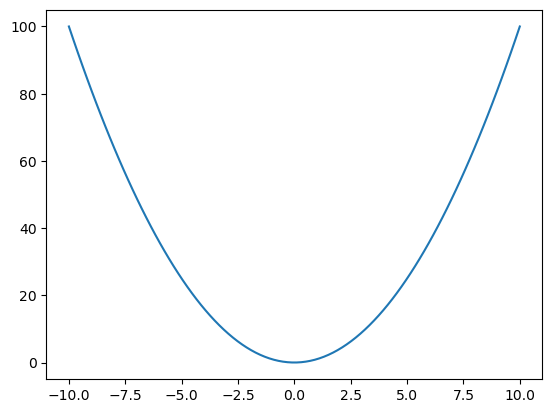

In [19]:
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

A parabola 𝑓(𝑥)=𝑎𝑥^2 will change in width and orientation depending on 𝑎a. For example, larger a values make the parabola narrower, while negative values flip its orientation.

#### 2.7 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [20]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [21]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [22]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

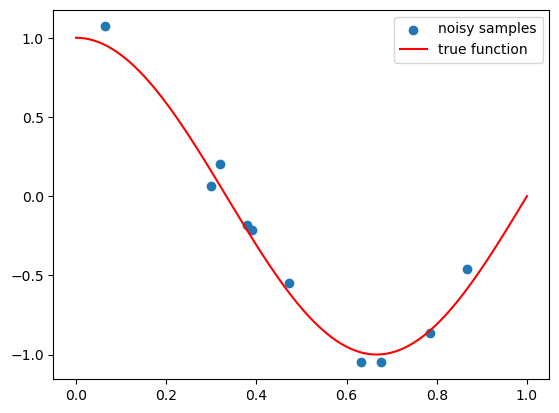

In [23]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

In [ ]:
polynomial_features = PolynomialFeatures(degree=#FILLEME,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

To plot the result, you can use the following code

In [ ]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

In [ ]:
polynomial_features = PolynomialFeatures(degree=#fillme,
                                             include_bias=False)
ridge_regression = Ridge(alpha=#fillme)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


For plotting you can reuse the following code

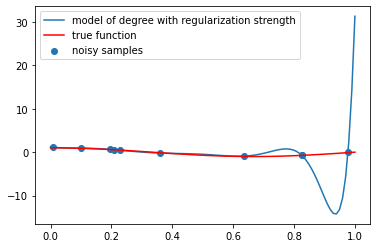

In [53]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

#### 2.8 What do you observe if you change the number of samples from the function?

As you change the number of samples, the overfitting or underfitting behavior of the model will become more pronounced.

#### 2.9 Why do we need a test set in machine learning? (1 point)

The test set is crucial to evaluate the model's performance on unseen data, preventing overfitting to the training set.

#### 2.10 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

The test set should not be used to optimize hyperparameters, as this would lead to data leakage. Instead, a separate validation set should be used for hyperparameter tuning.